In [1]:
# 일부만 할당된 GPU 메모리를 실행하는 동안 필요한만큼 늘릴 수 있도록 함
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

In [42]:

# 동일한 결과를 재현하기 위해서 random seed 고정
import numpy as np

np.random.seed(777)

In [43]:
# 모델 학습 시 불필요한 출력을 끄도록 함 (warning)
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.ERROR)

## 10.multiclass classification(iris)

1. 데이터 준비

In [48]:
import pandas as pd
import seaborn as sns

iris = sns.load_dataset("iris")
print(type(iris))
print(iris)

<class 'pandas.core.frame.DataFrame'>
     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
5             5.4          3.9           1.7          0.4     setosa
6             4.6          3.4           1.4          0.3     setosa
7             5.0          3.4           1.5          0.2     setosa
8             4.4          2.9           1.4          0.2     setosa
9             4.9          3.1           1.5          0.1     setosa
10            5.4          3.7           1.5          0.2     setosa
11            4.8          3.4           1.6          0.2     setosa
12            4.8          3.0           1.4          0.1     set

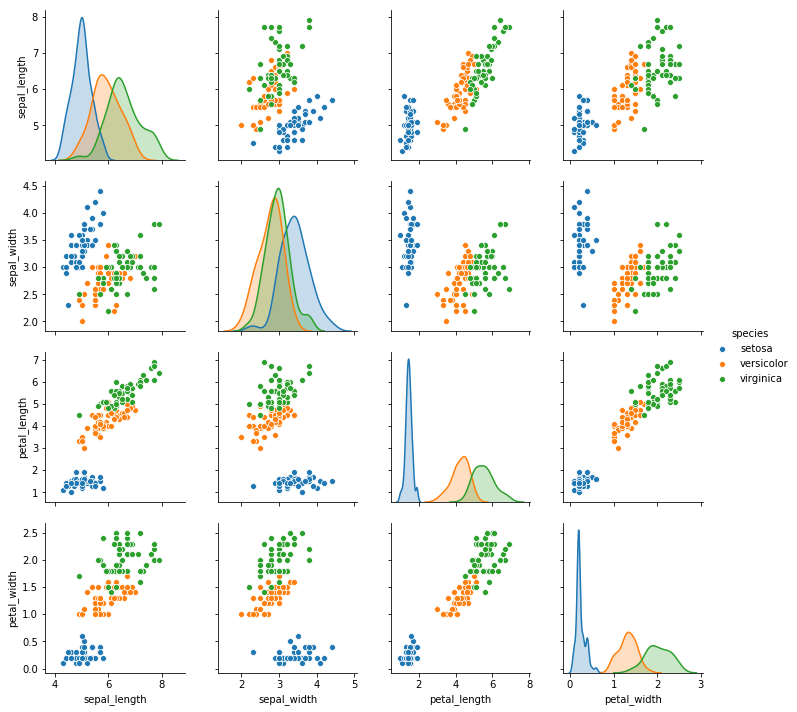

In [49]:
sns.pairplot(iris, hue = 'species')
# hue = label (category일 떄 지정)

In [51]:
iris.info()
iris['species'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


array(['setosa', 'versicolor', 'virginica'], dtype=object)

    category 변수의 class 갯수 출력

In [52]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [53]:
X = iris.iloc[:, 0:4].values
print(X)

print()

y = iris.iloc[:,4].values
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

2. 데이터 전처리

더미변수 생성

    LabelEncoder()를 통해 y열을 정수로 변환
    pd.get_dummies(정수변환한 y)를 통해 더비변수로 변환

In [54]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
print(y1)

Y = pd.get_dummies(y1).values
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
# random_state는 난수 발생을 위한 seed의 인자값

In [56]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120, 3)
(30, 4)
(30, 3)


3. 네트워크 정의 + 컴파일

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(8, input_shape = (4, ), activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 27        
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


4. 모델 학습

In [58]:
hist = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100)

Train on 120 samples, validate on 30 samples
Epoch 1/100
120/120 [==============================] - 1s 10ms/sample - loss: 1.8386 - acc: 0.2917 - val_loss: 1.9122 - val_acc: 0.4000
Epoch 2/100
120/120 [==============================] - 0s 216us/sample - loss: 1.7788 - acc: 0.2917 - val_loss: 1.8375 - val_acc: 0.4000
Epoch 3/100
120/120 [==============================] - 0s 258us/sample - loss: 1.7088 - acc: 0.3083 - val_loss: 1.7674 - val_acc: 0.4333
Epoch 4/100
120/120 [==============================] - 0s 224us/sample - loss: 1.6535 - acc: 0.3083 - val_loss: 1.6977 - val_acc: 0.4333
Epoch 5/100
120/120 [==============================] - 0s 242us/sample - loss: 1.5936 - acc: 0.3083 - val_loss: 1.6326 - val_acc: 0.4333
Epoch 6/100
120/120 [==============================] - 0s 166us/sample - loss: 1.5384 - acc: 0.3083 - val_loss: 1.5707 - val_acc: 0.4333
Epoch 7/100
120/120 [==============================] - 0s 142us/sample - loss: 1.4865 - acc: 0.3083 - val_loss: 1.5120 - val_acc: 0.43

5. 학습 과정 확인

In [59]:
hist.history

{'loss': [1.8385679562886557,
  1.778822422027588,
  1.708849024772644,
  1.653549353281657,
  1.5936353127161662,
  1.538385240236918,
  1.4864532152811687,
  1.4346243937810261,
  1.3913746277491252,
  1.356643541653951,
  1.322336443265279,
  1.2889777183532716,
  1.2539240996042886,
  1.2211674133936563,
  1.1900951941808064,
  1.1595607995986938,
  1.1253645181655885,
  1.094301199913025,
  1.0629232803980508,
  1.0311748186747234,
  1.0012946804364522,
  0.9708565553029378,
  0.9392496744791666,
  0.9093147873878479,
  0.8788249055544536,
  0.8501596132914225,
  0.8218060334523519,
  0.7955095171928406,
  0.7701550841331481,
  0.7460705916086833,
  0.7231988469759624,
  0.701043705145518,
  0.6823197841644287,
  0.6656440615653991,
  0.649121888478597,
  0.6337854901949564,
  0.6202447454134623,
  0.6070044954617818,
  0.5953839739163717,
  0.5845355788866679,
  0.5746010025342305,
  0.5652103861172993,
  0.5561036944389344,
  0.5479232788085937,
  0.540241911013921,
  0.53292516

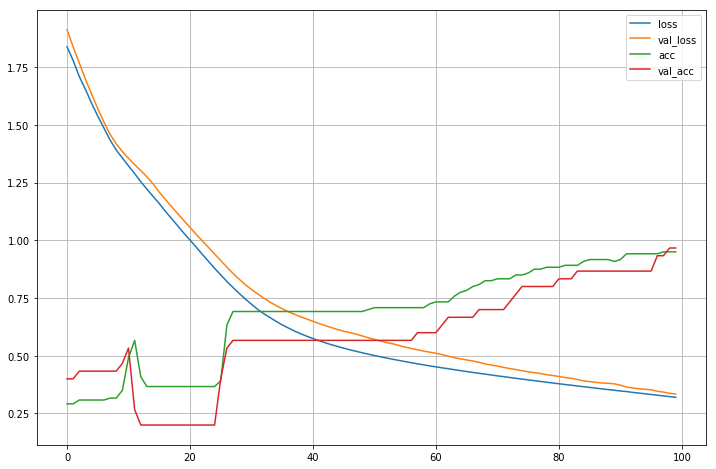

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])

plt.legend(['loss', 'val_loss', 'acc', 'val_acc'])
plt.grid()
plt.show()

6. 분류 결과 분석

    precision, recall 산출

In [62]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis = 1) # 행별로 max값의 index를 반환

y_test_class = np.argmax(y_test, axis = 1)

print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

   micro avg       0.97      0.97      0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [68]:
y_test_class

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0], dtype=int64)

In [64]:
y_pred

array([[7.6031714e-04, 2.0018889e-01, 7.9905081e-01],
       [8.3743431e-02, 6.3311666e-01, 2.8313997e-01],
       [9.6755230e-01, 3.1976212e-02, 4.7154346e-04],
       [7.7196182e-04, 2.5542966e-01, 7.4379838e-01],
       [9.5325178e-01, 4.5690782e-02, 1.0574013e-03],
       [3.9107606e-04, 1.7906015e-01, 8.2054877e-01],
       [9.5282322e-01, 4.6118733e-02, 1.0580035e-03],
       [2.6039150e-02, 5.9097457e-01, 3.8298625e-01],
       [2.4596272e-02, 5.8412486e-01, 3.9127886e-01],
       [6.9111086e-02, 6.3826430e-01, 2.9262462e-01],
       [2.0380104e-03, 2.8426516e-01, 7.1369684e-01],
       [3.0478904e-02, 5.9276664e-01, 3.7675452e-01],
       [2.4179915e-02, 5.4347652e-01, 4.3234357e-01],
       [2.1617064e-02, 5.5449766e-01, 4.2388532e-01],
       [1.6247550e-02, 5.0309783e-01, 4.8065466e-01],
       [9.5630229e-01, 4.2736620e-02, 9.6108887e-04],
       [1.7234022e-02, 5.0451320e-01, 4.7825277e-01],
       [2.1171499e-02, 4.9261183e-01, 4.8621666e-01],
       [9.3724459e-01, 6.087

In [69]:
cm = confusion_matrix(y_test_class, y_pred_class) # 가로-세로 축 유의
# 행 별로 max값(확률이 가장 높은)을 반환한 리스트
print(cm)

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


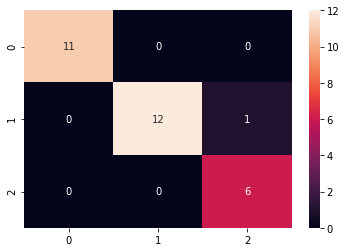

In [71]:
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot = True, fmt = 'd')

## 11.multiclass classification(MNIST)

1. 데이터 준비

In [94]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [95]:
print(train_images.shape)
print(len(train_images))
print(train_images.ndim)
print(train_images.dtype)

print()

print(train_labels)
print(train_labels.shape)
print(len(train_labels))
print(train_labels.ndim)
print(train_labels.dtype)

(60000, 28, 28)
60000
3
uint8

[5 0 4 ... 5 6 8]
(60000,)
60000
1
uint8


In [96]:
# train_labels = train_labels[:] + 10
# test_labels = test_labels[:] + 10

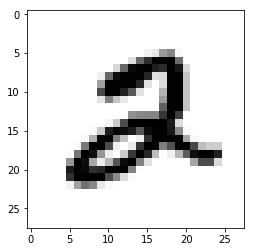

2


In [97]:
import matplotlib.pyplot as plt
%matplotlib inline


digit = train_images[5]
labels = train_labels[5]

plt.imshow(digit, cmap = plt.cm.binary)
plt.show()
print(labels)

imshow( cmap = 'str' )
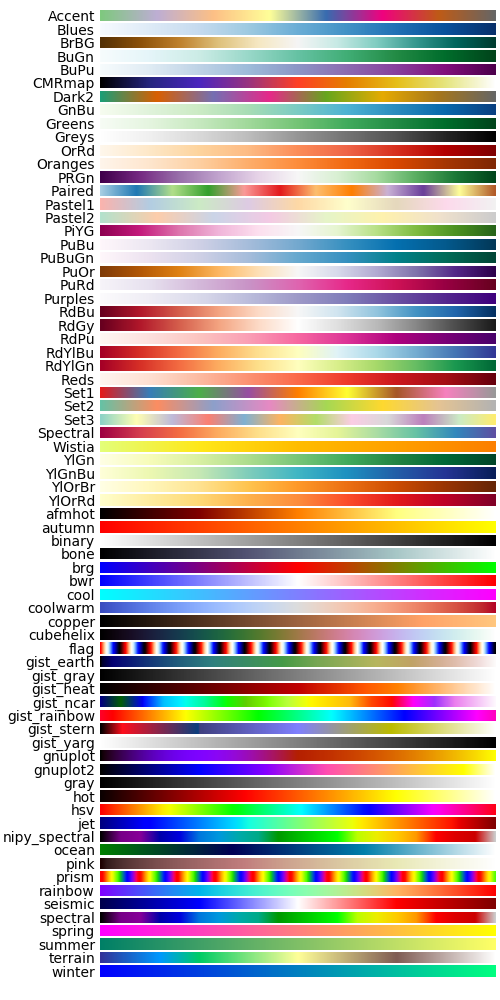

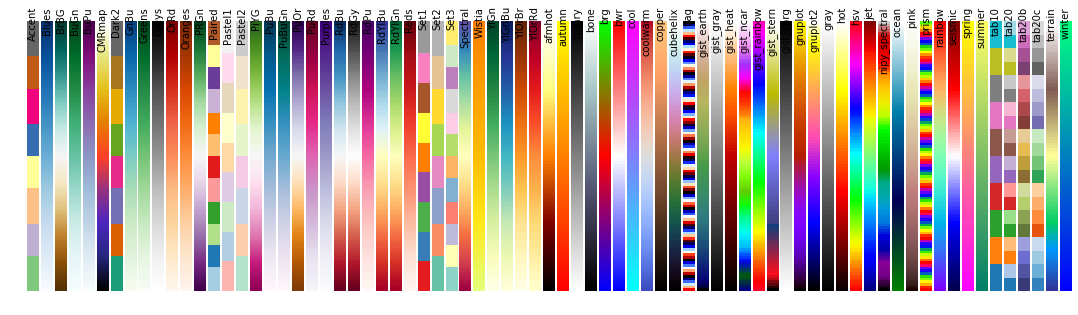

In [79]:
    from pylab import *
    from numpy import outer
    rc('text', usetex=False)
    a=outer(arange(0,1,0.01),ones(10))
    figure(figsize=(15,5))
    subplots_adjust(top=0.8,bottom=0.05,left=0.01,right=0.99)
    maps = [m for m in cm.datad if not m.endswith("_r")]
    maps.sort()
    l = len(maps)+1
    for i, m in enumerate(maps):
        subplot(1,l,i+1)
        axis("off")
        imshow(a,aspect='auto',cmap=get_cmap(m),origin="lower")
        title(m,rotation=90,fontsize=10)
    savefig("colormaps.png",dpi=100,facecolor='gray')

2. 데이터 전처리

In [98]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [99]:
train_labels[4]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

3. 네트워크 정의

In [100]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(32, activation = 'relu', input_shape = (28*28,)))
model.add(Dense(10, activation = 'softmax'))

4. 컴파일

In [101]:
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

5. 모델 훈련시키기

In [102]:
hist = model.fit(train_images,
                train_labels,
                epochs = 2,
                batch_size = 128,
                validation_data = (test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 35us/step - loss: 0.4553 - acc: 0.8797 - val_loss: 0.2655 - val_acc: 0.9261
Epoch 2/2
60000/60000 [==============================] - 1s 23us/step - loss: 0.2397 - acc: 0.9319 - val_loss: 0.2056 - val_acc: 0.9412


6. 모델 평가하기

In [103]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 32us/step
test_acc: 0.9412


In [104]:
import numpy as np

test_labels = test_labels.argmax(axis = -1)
pred_labels = model.predict(test_images).argmax(axis = -1)
print('target:', test_labels[0])
print('predict:', pred_labels[0])

target: 7
predict: 7


※ 오류 분석(error analysis)

In [105]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(test_labels, pred_labels) # pred는 value로 전달
print(cm)

[[ 958    0    1    1    1    5    9    2    2    1]
 [   0 1119    3    2    1    1    3    1    5    0]
 [   9    4  954    8    6    1    9   10   27    4]
 [   2    1   15  931    1   12    3   12   26    7]
 [   1    1    4    0  926    0    8    2    8   32]
 [   7    2    0   18    3  818   15    2   22    5]
 [   8    3    3    1    5   11  926    0    1    0]
 [   1   15   20    6    4    1    0  954    2   25]
 [   6    6    6   14    7   15   10   12  895    3]
 [   8    9    2   14   25    5    0    8    7  931]]


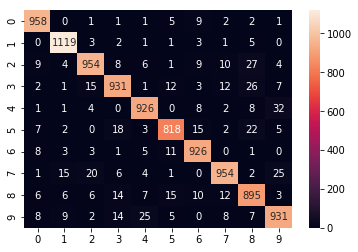

In [108]:
import pandas as pd
import seaborn as sns

df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot = True, fmt = 'd')

In [109]:
X_33 = test_images[(test_labels == 3) & (pred_labels == 3)]
X_35 = test_images[(test_labels == 3) & (pred_labels == 5)]
X_53 = test_images[(test_labels == 5) & (pred_labels == 3)]
X_55 = test_images[(test_labels == 5) & (pred_labels == 5)]

print(X_33.shape)
print(X_35.shape)
print(X_53.shape)
print(X_55.shape)

(931, 784)
(12, 784)
(18, 784)
(818, 784)


In [135]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # 1 row당 출력할 이미지 갯수
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    # n개의 행 갯수를 지정 / 만약 13개라면 3+1되서 우선 4개의 행을 만들기 위함
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    # 13개면 4*4 -13이 됨
    images.append(np.zeros((size, size * n_empty)))
    # 13개면 n_empty가 3이므로 28*28로 만든 image에 0으로 채운 값을 추가해준다 (0은 흰색)
    # 옆으로 붙이는 이유는 아래 for문에서 어차피 4개씩 옆으로 이어붙임
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    # image라는 객체를 생성해서 한줄 한줄을 행끼리 이어붙임
    plt.imshow(image, cmap = 'binary', **options)
    plt.axis("off")

In [142]:
np.zeros((28,28*2))[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

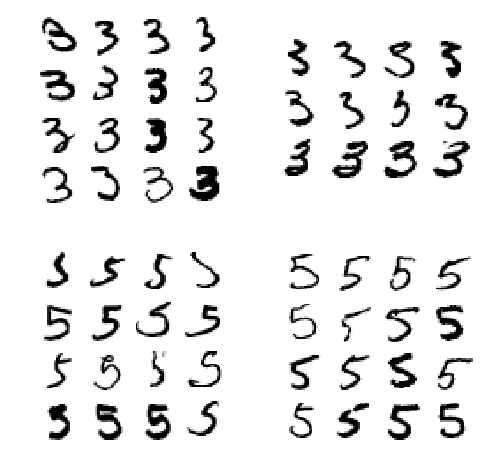

In [144]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_33[:16], images_per_row=4)
plt.subplot(222); plot_digits(X_35[:16], images_per_row=4)
plt.subplot(223); plot_digits(X_53[:16], images_per_row=4)
plt.subplot(224); plot_digits(X_55[:16], images_per_row=4)
plt.show()